# The Packages

In [1]:
from tensorflow.keras import Sequential, layers
from tensorflow import image, squeeze
import matplotlib.pyplot as plt
import numpy as np

# Getting The Data

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

img = x_train[4]

img = np.expand_dims(img, axis=0) # Because THe Shape Of My Image Is Only (28, 28), Must Be (1, 28, 28)

## Visualize Function

In [3]:
def visualize(Original, Augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(Original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(Augmented)

# Data Augmentation With Sequential Layer

## Rotation

In [4]:
Augmented = Sequential(
    [   
        layers.RandomRotation(0.2),  # Random rotation in the range [-0.4, 0.4]    
    ])

In [5]:
AugImg = Augmented(img)

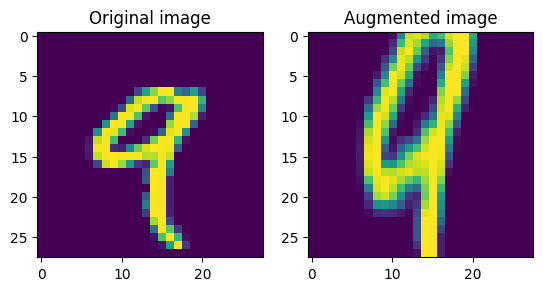

In [6]:
visualize(x_train[4], AugImg[0])

## Flip

In [7]:
Augmented1 = Sequential(
    [   
        layers.RandomFlip("horizontal")
    ])

"""
"horizontal" is a left-right flip and
"vertical" is a top-bottom flip. 
Defaults to "horizontal_and_vertical" 
"""

'\n"horizontal" is a left-right flip and\n"vertical" is a top-bottom flip. \nDefaults to "horizontal_and_vertical" \n'

In [8]:
AugImg1 = Augmented1(img)

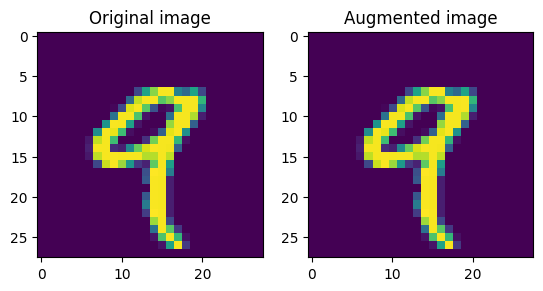

In [9]:
visualize(x_train[4], AugImg1[0])

## Zomming

In [10]:
Augmented2 = Sequential(
    [
    layers.RandomZoom(0.5),  # Random zoom in the range [1 - 0.5 , 1 + 0.5]
    ])

In [11]:
AugImg2 = Augmented2(img)

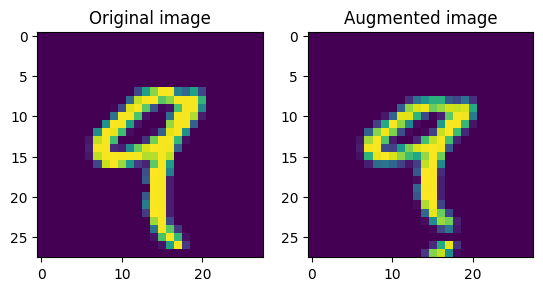

In [12]:
visualize(x_train[4], AugImg2[0])

## Brightness

In [13]:
Augmented3 = Sequential(
    [
    layers.RandomBrightness(0.7),  # Random brightness adjustment
    ])

In [14]:
AugImg3 = Augmented3(img)

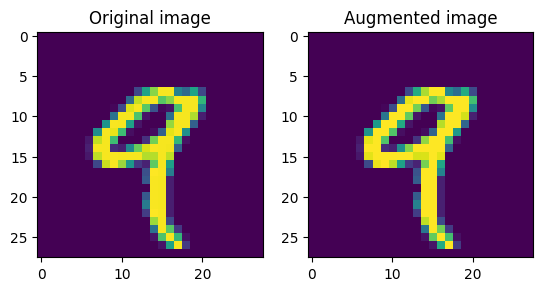

In [15]:
visualize(x_train[4], AugImg3[0])

## Resizing

In [16]:
Augmented4 = Sequential(
    [
    layers.Resizing(440, 440), # Resizing THe Image Into (240, 240)
    ])

In [17]:
AugImg4 = Augmented4(img)

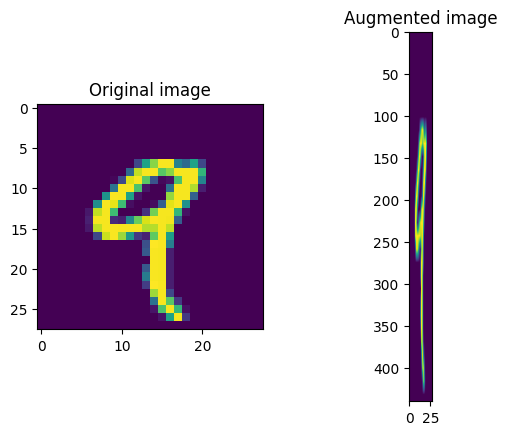

In [18]:
visualize(x_train[4], AugImg4[0])

## Rescaling

In [19]:
Augmented5 = Sequential(
    [   
    layers.Rescaling(1./128)
    ])

In [20]:
AugImg5 = Augmented5(img)

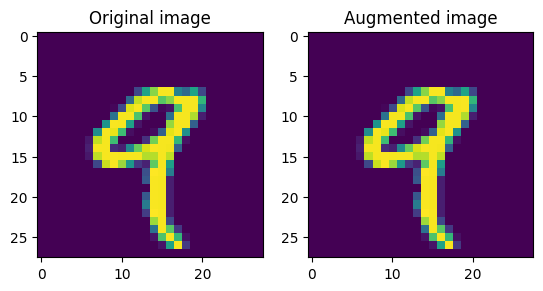

In [21]:
visualize(x_train[4], AugImg5[0])

## Apply The Functions Within The Model

In [22]:
model = Sequential(
    [
        Augmented,
        Augmented1,
        Augmented3,
        Augmented4,
        Augmented5,
        # Here I Add All Augmented Functions That I Create Before
        
        layers.Dense(128, activation='relu')
        
    ])

# Data Augmentation With 'Image' Class At Tensorflow

In [23]:
from tensorflow import image, constant

## Flip

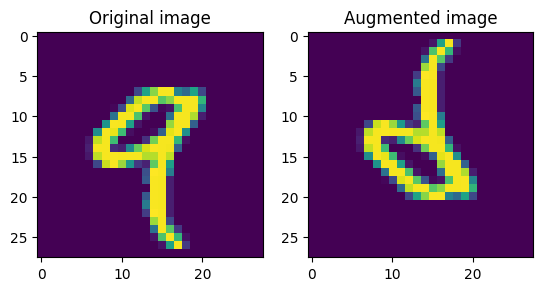

In [24]:
flipped = image.flip_left_right(img)

visualize(x_train[4], flipped[0])

## Brightness

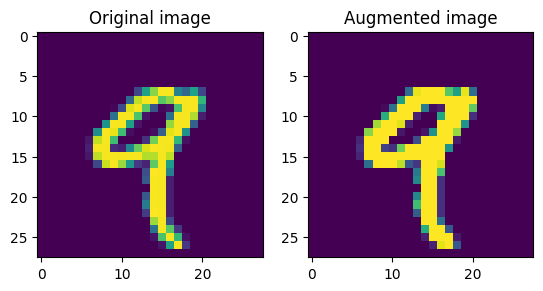

In [25]:
bright = image.adjust_brightness(img, 0.4)
visualize(x_train[4], bright[0])

## Cropped

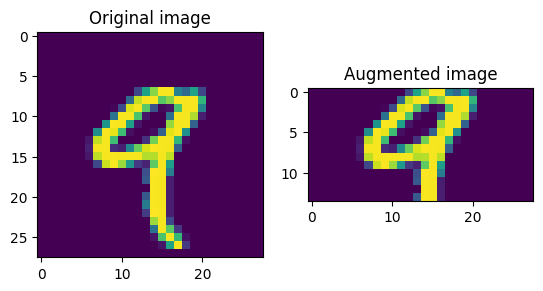

In [26]:
cropped = image.central_crop(img, central_fraction=0.5)
visualize(x_train[4], cropped[0])

## Rotate By 90^

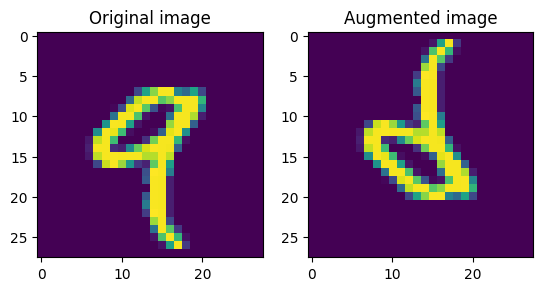

In [27]:
rotated = image.rot90(img)
visualize(x_train[4], np.squeeze(rotated))

# Data Augmentation With ImageDataGenerator

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\MoHaMeD\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\preprocessing\image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 28, 28) (28 channels).
  warnings.warn(


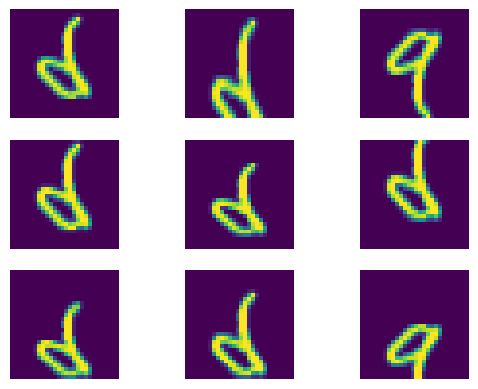

In [29]:
Augmanted = ImageDataGenerator(
    rotation_range=40,      # دوران عشوائي في النطاق [-40، 40] درجة
    width_shift_range=0.2,  # تحويل أفقي عشوائي
    height_shift_range=0.2, # تحويل عمودي عشوائي
    shear_range=0.2,        # تحويل الانقسام
    zoom_range=0.2,         # تكبير عشوائي
    horizontal_flip=True,   # انعكاس أفقي
    fill_mode='nearest'     # كيفية ملء المساحة الفارغة التي أنشئت بواسطة التحويلات
)


img = img.reshape((1,) + img.shape)

AugmentedImgs = Augmanted.flow(img)

i = 1

for AugmentedImg in AugmentedImgs:
    
    AugmentedImg =np.squeeze(AugmentedImg) # To Miss The Extra Dimentions
    
    plt.subplot(3, 3, i)
    
    plt.imshow(AugmentedImg.astype(np.uint8))  # اعرض الصورة المعدلة
    
    plt.axis('off')

    i+=1
    if i>=10:
        break
plt.show()

# Thank U